## **Import the TensorFlow library**

This code contains the training for a CNN in which the model learns to recognize the digits. This is different from the other training script because the model learns the digits from 0 to 6. The Idea is to have the digits 7,8,9 for the OL learning to be applied on STM32 Nucleo Board.

Questa parte di codice serve solo per essere compatibile con la OpenMV Cam

In [1]:
#!pip uninstall tensorflow
#!pip install tensorflow==2.4.0
#!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dropout, Dense, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt 
import numpy as np
import random
import os
import csv 
import tempfile

2022-10-17 22:57:11.784807: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Load MNIST dataset and split in training and test

In [3]:
(data_train, label_train),(data_test, label_test) = mnist.load_data() # Load data
print('The original dataset shapes are')
print(f'    Train dataset shape: {data_train.shape}')
print(f'    Test dataset shape:  {data_test.shape}')

The original dataset shapes are
    Train dataset shape: (60000, 28, 28)
    Test dataset shape:  (10000, 28, 28)


Split the train and test dataset in smaller datasets. Separation criterion is if the number is smaller than 6 or not.

In [4]:
train_samples = label_train.shape[0]
test_samples  = label_test.shape[0]

trainLow_samples  = np.sum(np.where(label_train < 6, 1, 0))
testLow_samples = np.sum(np.where(label_test <  6, 1, 0))

# separate in containers data that is lower nad higer than 6
data_low_train   = np.zeros([trainLow_samples,28,28])
label_low_train  = np.zeros(trainLow_samples)
data_high_train  = np.zeros([train_samples-trainLow_samples,28,28])
label_high_train = np.zeros(train_samples-trainLow_samples)

#data_low_test   = np.zeros([testLow_samples,28,28])
#label_low_test  = np.zeros(testLow_samples)
#data_high_test  = np.zeros([test_samples-testLow_samples,28,28])
#label_high_test = np.zeros(test_samples-testLow_samples)

data_low_test   = np.zeros([60,28,28])
label_low_test  = np.zeros(60)
data_high_test  = np.zeros([40,28,28])
label_high_test = np.zeros(40)

j,k = 0,0
for i in range(0,train_samples):  
    if(label_train[i]<6):
        data_low_train[j,:,:] = data_train[i,:,:]
        label_low_train[j]    = label_train[i]
        j+=1
    else:
        data_high_train[k,:,:] = data_train[i,:,:]
        label_high_train[k]    = label_train[i]
        k+=1

#j,k = 0,0
#for i in range(0,test_samples):  
#    if(label_test[i]<6):
#        data_low_test[j,:,:] = data_test[i,:,:]
#        label_low_test[j]    = label_test[i]
#        j+=1
#    else:
#        data_high_test[k,:,:] = data_test[i,:,:]
#        label_high_test[k]    = label_test[i]
#        k+=1

count_0 = 0
count_1 = 0
count_2 = 0
count_3 = 0
count_4 = 0
count_5 = 0
count_6 = 0
count_7 = 0
count_8 = 0
count_9 = 0

j,k = 0,0
n_elem_low = 10
n_elem_high = 10

for i in range(0,test_samples):
    if(label_test[i]==0 and count_0<n_elem_low):
        data_low_test[j,:,:] = data_test[i,:,:]
        label_low_test[j]    = label_test[i]
        count_0+=1
        j += 1
    if(label_test[i]==1 and count_1<n_elem_low):
        data_low_test[j,:,:] = data_test[i,:,:]
        label_low_test[j]    = label_test[i]
        count_1+=1
        j += 1
    if(label_test[i]==2 and count_2<n_elem_low):
        data_low_test[j,:,:] = data_test[i,:,:]
        label_low_test[j]    = label_test[i]
        count_2+=1
        j += 1
    if(label_test[i]==3 and count_3<n_elem_low):
        data_low_test[j,:,:] = data_test[i,:,:]
        label_low_test[j]    = label_test[i]
        count_3+=1
        j += 1
    if(label_test[i]==4 and count_4<n_elem_low):
        data_low_test[j,:,:] = data_test[i,:,:]
        label_low_test[j]    = label_test[i]
        count_4+=1
        j += 1
    if(label_test[i]==5 and count_5<n_elem_low):
        data_low_test[j,:,:] = data_test[i,:,:]
        label_low_test[j]    = label_test[i]
        count_5+=1
        j += 1
    if(label_test[i]==6 and count_6<n_elem_high):
        data_high_test[k,:,:] = data_test[i,:,:]
        label_high_test[k]    = label_test[i]
        count_6+=1
        k += 1
    if(label_test[i]==7 and count_7<n_elem_high):
        data_high_test[k,:,:] = data_test[i,:,:]
        label_high_test[k]    = label_test[i]
        count_7+=1
        k += 1
    if(label_test[i]==8 and count_8<n_elem_high):
        data_high_test[k,:,:] = data_test[i,:,:]
        label_high_test[k]    = label_test[i]
        count_8+=1
        k += 1
    if(label_test[i]==9 and count_9<n_elem_high):
        data_high_test[k,:,:] = data_test[i,:,:]
        label_high_test[k]    = label_test[i]
        count_9+=1
        k += 1

print('After the separation of the dataset in groups higer and lower/equal than 6 the datasets are:')
print(f'     Train dataset lower than 6 has shape:  {data_low_train.shape}')
print(f'     Train dataset higher than 6 has shape: {data_high_train.shape}')
print()
print(f'     Test dataset lower than 6 has shape:  {data_low_test.shape}')
print(f'     Test dataset higher than 6 has shape: {data_high_test.shape}')

After the separation of the dataset in groups higer and lower/equal than 6 the datasets are:
     Train dataset lower than 6 has shape:  (36017, 28, 28)
     Train dataset higher than 6 has shape: (23983, 28, 28)

     Test dataset lower than 6 has shape:  (60, 28, 28)
     Test dataset higher than 6 has shape: (40, 28, 28)


4
9.0


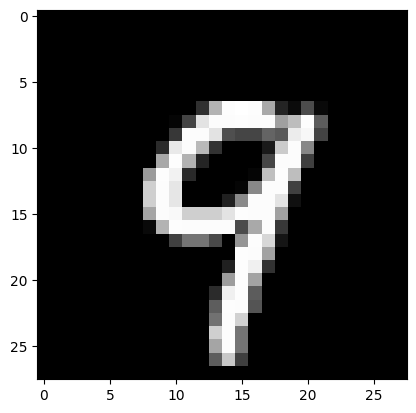

In [5]:
# Randomly check if dataset that I created are filled correctly
num = int(random.uniform(0,20))
print(num)
plt.imshow(data_high_test[num], cmap="gray") # Import the image
print(label_high_test[num])
plt.show() # Plot the image

## **Pre process the data**

In [6]:
# Image dimensions
img_rows, img_cols = 28, 28

In [7]:
# Something I don't know
if K.image_data_format() == 'channels_first':
    data_low_train  = data_low_train.reshape(data_low_train.shape[0], 1, img_rows, img_cols)
    data_high_train = data_high_train.reshape(data_high_train.shape[0], 1, img_rows, img_cols)
    data_low_test   = data_low_test.reshape(data_low_test.shape[0], 1, img_rows, img_cols)
    data_high_test  = data_high_test.reshape(data_high_test.shape[0], 1, img_rows, img_cols)
    input_shape     = (1, img_rows, img_cols)
else:
    data_low_train  = data_low_train.reshape(data_low_train.shape[0], img_rows, img_cols, 1)
    data_high_train = data_high_train.reshape(data_high_train.shape[0], img_rows, img_cols, 1)
    data_low_test   = data_low_test.reshape(data_low_test.shape[0], img_rows, img_cols, 1)
    data_high_test  = data_high_test.reshape(data_high_test.shape[0], img_rows, img_cols, 1)
    input_shape     = (img_rows, img_cols, 1)

Normalize the dataset

In [8]:
data_low_train  = data_low_train.astype(np.float32) / 255.0
data_high_train = data_high_train.astype(np.float32) / 255.0
data_low_test   = data_low_test.astype(np.float32) / 255.0
data_high_test  = data_high_test.astype(np.float32) / 255.0

## **BUILD THE MODEL**

In [9]:
TRAIN_MODEL_1 = True
TRAIN_MODEL_2 = False
TRAIN_MODEL_3 = False

In [10]:
batch_size = 32
epochs     = 10
validation_split = 0.1
optimizer  = "adam"
loss       = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics    = ['accuracy']

In [11]:
if(False):
    model = Sequential()
    model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(6, activation = "softmax"))

    model.compile(optimizer = optimizer, loss = loss, metrics = metrics)
    model.summary()

In [12]:
if(TRAIN_MODEL_1):
    model = Sequential()
    
    model.add(Conv2D(8, kernel_size=(3,3), activation='relu',input_shape=input_shape))
    model.add(Conv2D(8, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))


    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(6,activation='softmax'))

    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 8)         584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        2336      
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                    

2022-10-17 22:57:20.260512: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
#if(TRAIN_MODEL_1):
    #tf.keras.utils.plot_model(model, show_shapes=True, to_file='naive_inception_module.png')

In [14]:
# METHOD 2
# This model is a bit larger and should be much more precise in the feature extraction
if(TRAIN_MODEL_2):
    model2 = Sequential()
    model2.add(Conv2D(32, (3, 3), input_shape = input_shape))
    model2.add(Conv2D(32, (3, 3), activation = "relu"))
    model2.add(MaxPooling2D(pool_size = (2, 2)))
    model2.add(Dropout(0.2))
    model2.add(Flatten())
    model2.add(Dense(128, activation = "relu"))
    model2.add(Dropout(0.2))
    model2.add(Dense(6, activation = "softmax"))

    model2.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    model2.summary()

In [15]:
if(TRAIN_MODEL_3):

    l = tf.keras.layers # syntax shortcut

    def fire(x, squeeze, expand):
        y = l.Conv2D(filters=squeeze, kernel_size=1, padding='same', activation='relu')(x)
        y1 = l.Conv2D(filters=expand//2, kernel_size=1, padding='same', activation='relu')(y)
        y3 = l.Conv2D(filters=expand//2, kernel_size=3, padding='same', activation='relu')(y)
        return tf.keras.layers.concatenate([y1, y3])

    # this is to make it behave similarly to other Keras layers
    def fire_module(squeeze, expand):
        return lambda x: fire(x, squeeze, expand)

    # usage:
    x = tf.keras.layers.Input(shape=[*input_shape]) # input is 192x192 pixels RGB

    y = tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu')(x)
    y = fire_module(24, 48)(y)
    y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
    y = fire_module(24, 48)(y)
    y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
    y = fire_module(24, 48)(y)
    y = tf.keras.layers.GlobalAveragePooling2D()(y)
    y = tf.keras.layers.Dense(6, activation='softmax')(y)

    model3 = tf.keras.Model(x, y)
    model3.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    model3.summary()

## TRAIN THE MODEL

In [16]:
if(TRAIN_MODEL_1):
    
    labels_prova = keras.utils.to_categorical(label_low_train, 6)

    train_hist = model.fit(data_low_train, label_low_train, epochs = epochs, batch_size = batch_size, validation_split = validation_split)
    
  # Evaluate the model performance
    test_loss, test_acc = model.evaluate(data_low_test, label_low_test)

    print('\nTest accuracy:', test_acc)   # Print out the model accuracy 

Epoch 1/40


/Users/andrea/Documents/VS Code/MachineLearning/venv/lib/python3.10/site-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1013/1013 [==============================] - 15s 14ms/step - loss: 0.1571 - accuracy: 0.9478 - val_loss: 0.0303 - val_accuracy: 0.9919
Epoch 2/40
1013/1013 [==============================] - 16s 16ms/step - loss: 0.0430 - accuracy: 0.9863 - val_loss: 0.0251 - val_accuracy: 0.9936
Epoch 3/40
1013/1013 [==============================] - 14s 13ms/step - loss: 0.0300 - accuracy: 0.9903 - val_loss: 0.0265 - val_accuracy: 0.9931
Epoch 4/40
1013/1013 [==============================] - 13s 13ms/step - loss: 0.0230 - accuracy: 0.9927 - val_loss: 0.0243 - val_accuracy: 0.9936
Epoch 5/40
1013/1013 [==============================] - 13s 13ms/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.0187 - val_accuracy: 0.9944
Epoch 6/40
1013/1013 [==============================] - 13s 13ms/step - loss: 0.0170 - accuracy: 0.9941 - val_loss: 0.0218 - val_accuracy: 0.9953
Epoch 7/40
1013/1013 [==============================] - 15s 14ms/step - loss: 0.0133 - accuracy: 0.9960 - val_loss: 0.0230 - val_accura

In [50]:
if(TRAIN_MODEL_2):

    labels_prova = keras.utils.to_categorical(label_low_train, 6)

    model2.fit(data_low_train, labels_prova, epochs = epochs, batch_size = batch_size, validation_split = validation_split )

    # Evaluate the model performance
    test_loss, test_acc = model2.evaluate(data_low_test, keras.utils.to_categorical(label_low_test, 6))

    print('\nTest accuracy:', test_acc)   # Print out the model accuracy 

In [51]:
if(TRAIN_MODEL_3):
    
    labels_modified_test = keras.utils.to_categorical(label_low_train, 6)
    
    model3.fit(data_low_train, labels_modified_test, epochs = epochs, batch_size = batch_size, validation_split = validation_split)

    # Evaluate the model performance
    test_loss, test_acc = model3.evaluate(data_low_test, keras.utils.to_categorical(label_low_test, 6))

    print('\nTest accuracy:', test_acc)   # Print out the model accuracy 

## TEST THE MODEL

In [52]:
def hostiry_training_plot(model):
    hist_loss     = model.history['loss']
    hist_val_loss = model.history['val_loss']
    hist_acc      = train_hist.history['accuracy']
    hist_val_acc  = train_hist.history['val_accuracy']
    epoch_list    = list(range(epochs))
   
    plt.subplot(211)
    plt.plot(epoch_list, hist_acc,  label='Accuracy', linewidth=3)
    plt.plot(epoch_list, hist_val_acc,  label='Validation accuracy', linewidth=3)
    plt.legend(prop={'size': 17})
    plt.xlabel('Epochs',  fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    plt.subplot(212)
    plt.plot(epoch_list, hist_loss, 'bo', label='Training loss', linewidth=3)
    plt.plot(epoch_list, hist_val_loss, 'r', label='Validation loss', linewidth=3)
    plt.legend(prop={'size': 17})
    plt.xlabel('Epochs',  fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    ROOT_PATH = os.path.abspath('')
    PLOT_PATH = ROOT_PATH + "/Results/"
    plt.savefig(PLOT_PATH + 'training_History.jpg')
    plt.show()

function for generating a bar plot htat shows the accuracy of the model for each class

In [53]:
def plot_ConfusionMatrix(conf_matrix):

    figure = plt.figure()
    axes = figure.add_subplot()

    label = ['0','1','2','3','4','5']

    caxes = axes.matshow(conf_matrix, cmap=plt.cm.Blues)
    figure.colorbar(caxes)

    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            axes.text(x=j, y=i,s=int(conf_matrix[i, j]), va='center', ha='center', size='large')

    axes.xaxis.set_ticks_position("bottom")
    axes.set_xticklabels([''] + label)
    axes.set_yticklabels([''] + label)

    plt.xlabel('PREDICTED LABEL', fontsize=15)
    plt.ylabel('TRUE LABEL', fontsize=15)
    ROOT_PATH = os.path.abspath('')
    PLOT_PATH = ROOT_PATH + "/Results/"
    plt.savefig(PLOT_PATH + 'training_ConfMatrix.jpg')
    plt.show()

In [54]:
def testing(data, label_lett, model):

    conf_matrix = np.zeros((6,6))

    prediction = model.predict(data)
    
    for i in range(0, data.shape[0]):

        # Find the max iter for both true label and prediction
        max_i_true = int(label_lett[i])

        max_i_pred = np.argmax(prediction[i,:])

        conf_matrix[max_i_true, max_i_pred] = conf_matrix[max_i_true, max_i_pred] + 1

    return conf_matrix

In [56]:
def plot_Accuracy(conf_matrix):
                        
    tot_cntr = 0
    correct_cntr = 0

    corr_ary   = np.zeros(6)
    tot_ary    = np.zeros(6)
    bar_values = np.zeros(7) 

    letter_labels = ['0','1','2','3','4','5','Model']
    blue2 = 'cornflowerblue'
    colors = [blue2, blue2, blue2, blue2, blue2, blue2, 'steelblue']

    for i in range(0, conf_matrix.shape[0]):
        bar_values[i] = round(round(conf_matrix[i,i]/ sum(conf_matrix[i,:]), 4)*100,2)
        tot_cntr += sum(conf_matrix[i,:])
        correct_cntr += conf_matrix[i,i]

    bar_values[-1] = round(round(correct_cntr/tot_cntr, 4)*100,2)
    

    fig = plt.subplots(figsize =(10, 6))

    bar_plot = plt.bar(letter_labels, bar_values, color=colors, edgecolor='grey')

    for p in bar_plot:
        height = p.get_height()
        xy_pos = (p.get_x() + p.get_width() / 2, 105)

        plt.annotate(str(height) + '%', xy=xy_pos, xytext=(0, 0), textcoords="offset points", ha='center', va='bottom', fontsize=15,  fontweight ='bold')

    plt.axhline(y = 100, color = 'gray', linestyle = (0, (5, 10)) ) # Grey line at 100 %

    # Text and labels
    ROOT_PATH = os.path.abspath('')
    PLOT_PATH = ROOT_PATH + "/Results/"
    plt.ylim([0, 119])
    plt.ylabel('Accuracy %', fontsize = 20)
    plt.yticks(fontsize = 15)
    plt.xticks([r for r in range(len(letter_labels))], letter_labels, fontweight ='bold', fontsize = 15) # Write on x axis the letter name
    plt.savefig(PLOT_PATH + 'training_Test.jpg')
    plt.show()

    print(f"Total correct guesses  {sum(corr_ary)}  -> {round(round(sum(corr_ary)/sum(tot_ary), 4)*100,2)}%")


In [57]:
def plot_Table(conf_matrix):

    table_values = np.zeros([3,conf_matrix.shape[0]])

    for i in range(0, table_values.shape[1]):

        if(sum(conf_matrix[i,:])==0):   # if for avoiding division by 0 that generates NAN                                
            table_values[0,i] = 0
        else:
            table_values[0,i] = round(conf_matrix[i,i]/sum(conf_matrix[i,:]),2)      # ACCURACY

        if(sum(conf_matrix[:,i])==0):   # if for avoiding division by 0 that generates NAN
            table_values[1,i] = 0
        else:
            table_values[1,i] = round(conf_matrix[i,i]/sum(conf_matrix[:,i]),2)      # PRECISION 

        if((table_values[1,i]+table_values[0,i])==0):     # if for avoiding division by 0 that generates NAN
            table_values[2,i] = 0
        else:
            table_values[2,i] = round((2*table_values[1,i]*table_values[0,i])/(table_values[1,i]+table_values[0,i]),2)    # F1 SCORE

    
    fig, ax = plt.subplots(figsize=(6,4)) 
    ax.set_axis_off() 
    
    table = ax.table( 
        cellText = table_values,  
        rowLabels = ['Accuracy', 'Precision', 'F1 score'],  
        colLabels = ['0','1','2','3','4','5'], 
        rowColours =["cornflowerblue"] * 200,  
        colColours =["cornflowerblue"] * 200, 
        rowLoc='right',
        loc ='center')   

    table.set_fontsize(14)
    ROOT_PATH = os.path.abspath('')
    PLOT_PATH = ROOT_PATH + "/Results/"
    plt.savefig(PLOT_PATH + 'training_Table.jpg')
    plt.show()

In [58]:
#confusion_matrix = testing(data_low_test, label_low_test, model)
#hostiry_training_plot(train_hist)
#plot_Accuracy(confusion_matrix)
#plot_ConfusionMatrix(confusion_matrix)
#plot_Table(confusion_matrix)

In [59]:
if(TRAIN_MODEL_1):
    model_test = model
elif(TRAIN_MODEL_2):
    model_test = model2
elif(TRAIN_MODEL_3):
    model_test = model3

Il prossimo blocco non è necessario, restituisce errore per le lunghezze diverse di data_low_test e lables_modified_test. Anche mettondole uguali ancora si lamenta.

In [26]:
# tensorflow evaluation on the test dataset
#results = model_test.evaluate(data_low_test,labels_modified_test, batch_size=128)
#print("test loss, test acc:", results)

In [60]:
predictions = model_test.predict(data_low_test)   # Make prediction of entire dataset

2/2 [==============================] - 0s 5ms/step


In [61]:
num = int(random.uniform(0,data_low_test.shape[0]))
print("Prediction = " , np.argmax(predictions[num]))
print("True label = " , label_low_test[num])

Prediction =  2
True label =  2.0


In [63]:
def plot_image(i, predictions_array, true_label, img):
    class_names = ['0','1','2','3','4','5']

    true_label, img = int(true_label[i]), img[i,:,:]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    img = (np.squeeze(img))## you have to delete the channel information (if grayscale) to plot the image
    plt.imshow(img, cmap="gray")

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)   


def plot_value_array(i, predictions_array, true_label):
    true_label = int(true_label[i])
    plt.grid(False)
    plt.xticks(range(6))
    plt.yticks([])
    thisplot = plt.bar(range(6), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

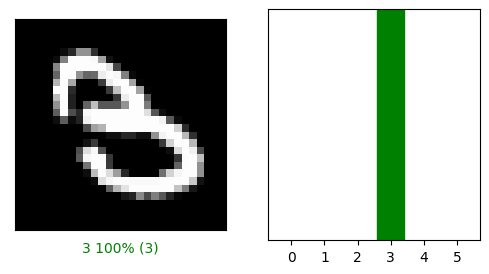

In [64]:
num = int(random.uniform(0, predictions.shape[0]))

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(num, predictions[num], label_low_test, data_low_test)
plt.subplot(1,2,2)

plot_value_array(num, predictions[num], label_low_test)
plt.show()

## **SAVE ORIGINAL MODEL AND FROZEN MODEL**

In [65]:
def save_summary_model(model, MODEL_PATH, flag):
      with open(MODEL_PATH + 'model_summary.txt', "w") as new_file:

        new_file.write("PARAMETERS SAVED FROM THE TRAINING")
        if(flag==0):
           new_file.write("\n\n This model has been trained for learning the first 6 digits from the MNIST dataset, this is the ORIGINAL MODEL")
        elif(flag==1):
          new_file.write("\n\n This model has been trained for learning the first 6 digits from the MNIST dataset, this is the FROZEN MODEL")
        new_file.write("\n")
        new_file.write("\n Batch size:       " + str(batch_size))
        new_file.write("\n Epochs:           " + str(epochs))
        new_file.write("\n Metrics:          " + str(metrics))
        new_file.write("\n Optimizer:        " + optimizer)
        new_file.write("\n Loss:             " + "SparseCategoricalCrossentropy \n\n")

        model.summary(print_fn=lambda x: new_file.write(x + '\n'))
      new_file.close()

In [66]:
ROOT_PATH = os.path.abspath('')
SAVE_MODEL_PATH = ROOT_PATH + "/Saved_models/Backup_models/Last_trained_model"

ORIGINAL_MODEL_PATH = SAVE_MODEL_PATH + "/Original_model/" 

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print('Save ORIGINAL MODEL as mnist_cnn.h5')
model_test.save(ORIGINAL_MODEL_PATH + "mnist_cnn.h5")
save_summary_model(model_test, ORIGINAL_MODEL_PATH, 0)

Test loss: 1.2848538062826265e-05
Test accuracy: 1.0
Save ORIGINAL MODEL as mnist_cnn.h5


Now create the frozen model version for the one just saved. Which means just to cut away the last layer and save the model without the kast kayer. This should be instead saved in a txt/library file.

### SAVE THE FROZEN MODEL

In [67]:
# CREATE AND SAVE THE FROZEN MODEL
frozen_model = keras.models.Sequential(model_test.layers[:-1])
frozen_model.summary()
frozen_model.compile()

FROZEN_MODEL_PATH = SAVE_MODEL_PATH + "/Frozen_model/"

print('Save FROZEN MODEL model as mnist_cnn.h5')
frozen_model.save(FROZEN_MODEL_PATH + "mnist_cnn.h5")
save_summary_model(frozen_model, FROZEN_MODEL_PATH, 1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 8)         584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        2336      
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                  

Now save also the last layer weights in a txt file, this will later be used in the OpenMV camera for loading the weights that have been already trained. (ll = last layer)

In [68]:
ll_weights = np.array(model_test.layers[-1].get_weights()[0])   # get last layer weights from TF model
ll_biases  = np.array(model_test.layers[-1].get_weights()[1])   # get last layer biases from TF model
print(f'The shape of the last layer weights is: {ll_weights.shape}')
print(f'The shape of the last layer biases is: {ll_biases.shape}')


# -------- WEIGHTS
# NB: the filof weights is separated in smaller rows (338 float values on each row)
# thjis is done in order to make it easier for the OpenMV camera to load each line (memory problems)
with open(FROZEN_MODEL_PATH + 'll_weights.txt', 'w') as new_file:

    for j in range(0, ll_weights.shape[1]):
        for i in range(0, ll_weights.shape[0]): 
            if(i%338==0 and i!= 0 and i != ll_weights.shape[0]-1):
                new_file.write('\n')
                
            new_file.write(str(ll_weights[i,j]))
            
            if(i == ll_weights.shape[0]-1):
                new_file.write('\n')
            elif((i+1)%338 == 0):
                dummy = 0
            else:
                new_file.write(',')

new_file.close()


# -------- BIASES
with open(FROZEN_MODEL_PATH + 'll_biases.txt', 'w') as new_file:

    for i in range(0, ll_biases.shape[0]):     
        new_file.write(str(ll_biases[i])) 
        if(i!=ll_biases.shape[0]-1):
            new_file.write(',')
new_file.close()

The shape of the last layer weights is: (512, 6)
The shape of the last layer biases is: (6,)


# Pruning

In [35]:
pip install tensorflow_model_optimization

Note: you may need to restart the kernel to use updated packages.


In [36]:
# Install needed optimization toolkit
from tensorflow.keras.models import load_model
import tensorflow_model_optimization as tfmot

In [37]:
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after n epochs.
batch_size = 32
epochs = 5
validation_split = 0.1  # 10% of training set will be used for validation set. 

num_images = data_low_train.shape[0] * (1 - validation_split)
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
    'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step)
}


model_for_pruning = prune_low_magnitude(model_test, **pruning_params)

# `prune_low_magnitude` requires a recompile.

# Select appropriate optimizer
model_for_pruning.compile(optimizer='adam',
                          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                          metrics=['accuracy'])

model_for_pruning.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d   (None, 26, 26, 8)        154       
 (PruneLowMagnitude)                                             
                                                                 
 prune_low_magnitude_conv2d_  (None, 24, 24, 8)        1162      
 1 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_max_poo  (None, 12, 12, 8)        1         
 ling2d (PruneLowMagnitude)                                      
                                                                 
 prune_low_magnitude_conv2d_  (None, 10, 10, 32)       4642      
 2 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_conv2d_  (None, 8, 8, 32)         1

In [38]:
logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

model_for_pruning.fit(data_low_train, label_low_train,
                    batch_size=batch_size, epochs=epochs, validation_split=validation_split, callbacks=callbacks)

Epoch 1/5
1013/1013 [==============================] - 15s 12ms/step - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.0151 - val_accuracy: 0.9969
Epoch 2/5
1013/1013 [==============================] - 12s 12ms/step - loss: 0.0084 - accuracy: 0.9977 - val_loss: 0.0157 - val_accuracy: 0.9958
Epoch 3/5
1013/1013 [==============================] - 11s 11ms/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.0162 - val_accuracy: 0.9956
Epoch 4/5
1013/1013 [==============================] - 12s 11ms/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0192 - val_accuracy: 0.9961
Epoch 5/5
1013/1013 [==============================] - 12s 12ms/step - loss: 0.0083 - accuracy: 0.9968 - val_loss: 0.0178 - val_accuracy: 0.9967


In [39]:
_, model_for_pruning_accuracy = model_for_pruning.evaluate(data_low_test, label_low_test, verbose=0)

print('Original test accuracy: ', test_acc)
print('Pruned test accuracy:   ', model_for_pruning_accuracy)

Original test accuracy:  1.0
Pruned test accuracy:    1.0


In [40]:
# First, create a compressible model for TensorFlow

PRUNED_MODEL_PATH = SAVE_MODEL_PATH + "/Pruned_model"


model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)
model_for_export.save(PRUNED_MODEL_PATH + '/OMV_Pruned_cnn.h5', include_optimizer=False)

In [41]:
# Then, create a compressible model for TFLite

converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
pruned_tflite_model = converter.convert()

with open(PRUNED_MODEL_PATH + '/OMV_Pruned_cnn.tflite', 'wb') as f:
    f.write(pruned_tflite_model)

INFO:tensorflow:Assets written to: /var/folders/48/lcqkmdxs143dt92dvrnfr3nh0000gn/T/tmpscaexy0f/assets


INFO:tensorflow:Assets written to: /var/folders/48/lcqkmdxs143dt92dvrnfr3nh0000gn/T/tmpscaexy0f/assets
2022-10-17 23:07:07.630760: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-10-17 23:07:07.631116: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-10-17 23:07:07.634363: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/48/lcqkmdxs143dt92dvrnfr3nh0000gn/T/tmpscaexy0f
2022-10-17 23:07:07.642994: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-10-17 23:07:07.643132: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/48/lcqkmdxs143dt92dvrnfr3nh0000gn/T/tmpscaexy0f
2022-10-17 23:07:07.652056: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-10-17 23:07:07.654635: I tensorflow/cc/saved_model/load

In [42]:
def get_gzipped_model_size(file):
    # Returns size of gzipped model, in bytes.
    import os
    import zipfile

    _, zipped_file = tempfile.mkstemp('.zip')
    with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
        f.write(file)

    return os.path.getsize(zipped_file)

In [43]:
print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(FROZEN_MODEL_PATH + "mnist_cnn.h5")))
print("Size of gzipped pruned Keras model  : %.2f bytes" % (get_gzipped_model_size(PRUNED_MODEL_PATH + '/OMV_Pruned_cnn.h5')))
print("Size of gzipped pruned TFlite model : %.2f bytes" % (get_gzipped_model_size(PRUNED_MODEL_PATH + '/OMV_Pruned_cnn.tflite')))

Size of gzipped baseline Keras model: 48585.00 bytes
Size of gzipped pruned Keras model  : 21519.00 bytes
Size of gzipped pruned TFlite model : 20080.00 bytes


In [44]:
frozen_pruned_model = keras.models.Sequential(model_for_pruning.layers[:-1])
frozen_pruned_model.summary()
frozen_pruned_model.compile()

FROZEN_PRUNED_MODEL_PATH = SAVE_MODEL_PATH + "/Frozen_Pruned_model"

print('Save FROZEN PRUNED MODEL model as OMV_Frozen_pruned_cnn.h5')
frozen_pruned_model.save(FROZEN_PRUNED_MODEL_PATH + "OMV_Frozen_pruned_cnn.h5")
save_summary_model(frozen_pruned_model, FROZEN_PRUNED_MODEL_PATH, 1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d   (None, 26, 26, 8)        154       
 (PruneLowMagnitude)                                             
                                                                 
 prune_low_magnitude_conv2d_  (None, 24, 24, 8)        1162      
 1 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_max_poo  (None, 12, 12, 8)        1         
 ling2d (PruneLowMagnitude)                                      
                                                                 
 prune_low_magnitude_conv2d_  (None, 10, 10, 32)       4642      
 2 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_conv2d_  (None, 8, 8, 32)        

Tflite frozen pruned

In [45]:
model_for_export2 = tfmot.sparsity.keras.strip_pruning(frozen_pruned_model)
model_for_export2.save(PRUNED_MODEL_PATH + '/OMV_Frozen_pruned_cnn.h5', include_optimizer=False)

In [46]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export2)
pruned_tflite_fmodel = converter.convert()

with open(PRUNED_MODEL_PATH + '/OMV_Pruned_cnn.tflite', 'wb') as f:
    f.write(pruned_tflite_fmodel)

INFO:tensorflow:Assets written to: /var/folders/48/lcqkmdxs143dt92dvrnfr3nh0000gn/T/tmp2gdp1c7s/assets


INFO:tensorflow:Assets written to: /var/folders/48/lcqkmdxs143dt92dvrnfr3nh0000gn/T/tmp2gdp1c7s/assets
2022-10-17 23:07:12.277551: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-10-17 23:07:12.277568: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-10-17 23:07:12.277711: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/48/lcqkmdxs143dt92dvrnfr3nh0000gn/T/tmp2gdp1c7s
2022-10-17 23:07:12.279581: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-10-17 23:07:12.279600: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/48/lcqkmdxs143dt92dvrnfr3nh0000gn/T/tmp2gdp1c7s
2022-10-17 23:07:12.285850: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-10-17 23:07:12.317426: I tensorflow/cc/saved_model/loader.cc:213] Running initialization

# FEATURE EXTRACTION FOR CLUSTERING

Pruned

In [47]:
data_test = np.concatenate((data_low_test, data_high_test))
label_test = np.concatenate((label_low_test, label_high_test))
features = frozen_pruned_model.predict(data_test)

4/4 [==============================] - 0s 3ms/step


In [48]:
count = 0

for i in range(0, len(features[:,1])):
  for j in range(0, len(features[1,:])):
    if features[i,j] == 0:
      count +=1

print(count/len(features[:,1])/len(features[1,:])*100)

64.48046875


In [49]:
np.savetxt(FROZEN_PRUNED_MODEL_PATH +'/'+'ll_features_p_10.txt',features, fmt='%.3f')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/andrea/Documents/VS Code/MachineLearning/Saved_models/Backup_models/Last_trained_model/Frozen_Pruned_model/ll_features_p_10.txt'

In [ ]:
with open(FROZEN_PRUNED_MODEL_PATH +'/'+'ll_features_p_10.txt', 'w') as new_file:

    for i in range(0, features.shape[0]):
        for j in range(0, features.shape[1]): 
            if features[i,j] != 0:
              str1 = '%.3f '%features[i,j]
            else:
              str1 = '0 '

            new_file.write(str1)
            
        new_file.write('\n')     

new_file.close()

np.savetxt(FROZEN_PRUNED_MODEL_PATH +'/'+'ll_labels_features_p_10.txt',label_test, fmt='%1d')

Original

In [69]:
features = frozen_model.predict(data_test)

4/4 [==============================] - 0s 3ms/step


In [70]:
np.savetxt(ORIGINAL_MODEL_PATH +'/'+'ll_features_10.txt',features, fmt='%.3f')

In [71]:
with open(ORIGINAL_MODEL_PATH +'/'+'ll_features_10.txt', 'w') as new_file:

    for i in range(0, features.shape[0]):
        for j in range(0, features.shape[1]): 
            if features[i,j] != 0:
              str1 = '%.3f '%features[i,j]
            else:
              str1 = '0 '

            new_file.write(str1)
            
        new_file.write('\n')     

new_file.close()

np.savetxt(ORIGINAL_MODEL_PATH +'/'+'ll_labels_features_10.txt',label_test, fmt='%1d')